# Discrete time dynamical system

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import statistics as stat
from sklearn.metrics import mean_squared_error

In [2]:
#Given data
run_time=(2070-2021+1)
x = np.zeros(run_time+1)
x[0]=1000
r=0.04
year=[]
for i in range(2021,2071):
    year.append(i)

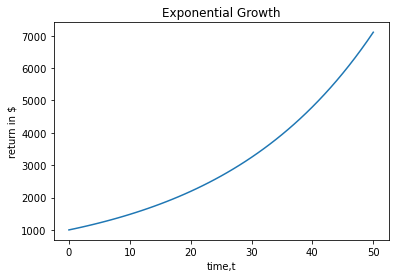

Text(0, 0.5, 'log[x]')

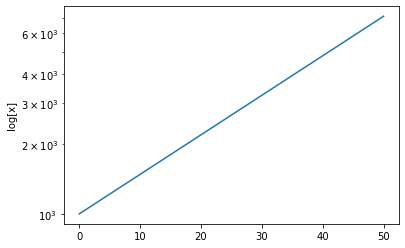

In [3]:
for t in range(1,run_time+1):
    x[t] = x[t-1]* (1+r) 
  
    
plt.plot(x)
plt.xlabel('time,t')
plt.ylabel('return in $')
plt.title('Exponential Growth')
plt.show()
# to check if the function is exponent, log[x] gives 
plt.semilogy(x)
plt.ylabel('log[x]')

# Exponential Function

In [4]:
df=pd.DataFrame(year,columns=['Year'])
df1=pd.DataFrame(x)
df['Data']=df1

Text(0.5, 1.0, 'The Difference between the two plots')

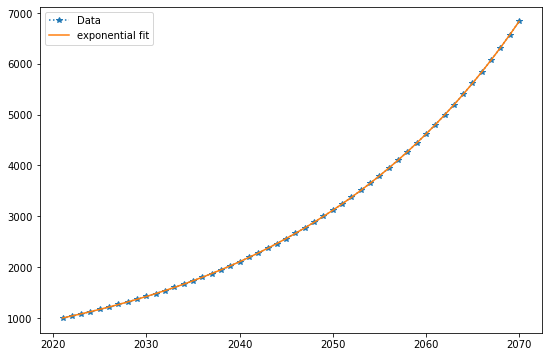

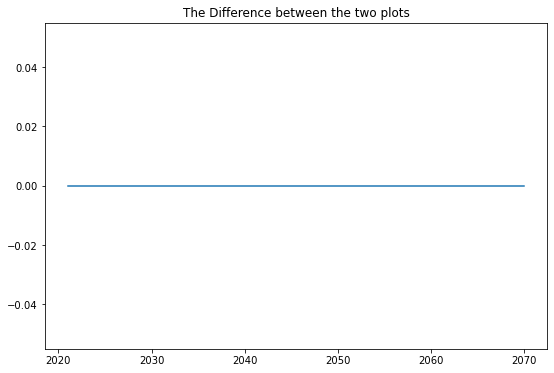

In [8]:
plt.figure(figsize=(9,6))
plt.plot(df['Year'], df['Data'],'*:', label='Data')

# a=np.exp(fit_result[1])
# b=fit_result[0]
# y_fitted = a * np.exp(b * df['Year'])
# ax = plt.axes()
# ax.scatter(df['Year'],df['Data'], label='Raw data')
# ax.plot(df['Year'], y_fitted, 'k', label='Fitted curve')


fit_result = np.polyfit(df['Year'].values, np.log(df['Data'].values), 1,w=np.sqrt(df['Data'].values))
plt.plot(df['Year'], np.exp(np.polyval(fit_result, df['Year'])), label=f"exponential fit")
plt.legend()
plt.figure(figsize=(9,6))
df['Dif1']=np.exp(np.polyval(fit_result, df['Year'])-df['Data'])
plt.plot(df['Year'],df['Dif1'])
plt.title('The Difference between the two plots')

Text(0.5, 1.0, 'The Difference between the two plots')

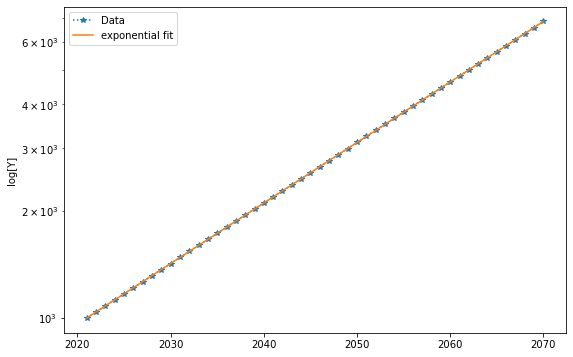

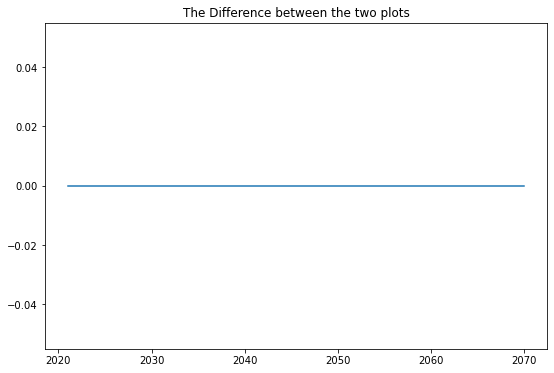

In [6]:
plt.figure(figsize=(9,6))
plt.semilogy(df['Year'], df['Data'],'*:', label='Data')
plt.ylabel('log[Y]')

# fit to exponent. 
fit_result = np.polyfit(df['Year'].values, np.log(df['Data'].values), 1, w=np.sqrt(df['Data'].values))

plt.plot(df['Year'], np.exp(np.polyval(fit_result, df['Year'])), label=f"exponential fit")
plt.legend()

plt.figure(figsize=(9,6))
df['Dif2']=np.exp(np.polyval(fit_result, df['Year'])-(df['Data']))
plt.plot(df['Year'],df['Dif2'])
plt.title('The Difference between the two plots')

- The exponential function best explains our system.
- The two plots match; the difference between them = zero

# Stocastic Model

In [9]:
#given information

mu=0.04
sigma=0.06
run_time=(2070-2021+1)
x = np.zeros(run_time+1)
x[0]=1000
year=[]
for i in range(2021,2071):
    year.append(i)

#r=np.random.normal(mu, sigma)
#x[t]=x[t-1]*(np.random.normal(mu, sigma)+1)

In [13]:
estimated_returns_per_n=[]

for n in range(10):
    estimated_returns=[]
    for t in range(1,run_time+1):
        x[t] = x[t-1]* (1+np.random.normal(mu, sigma))
        estimated_returns.append(x[t-1])
    estimated_returns_per_n.append(estimated_returns)    


means = [sum(sub_list) / len(sub_list) for sub_list in zip(*estimated_returns_per_n)]
diviations=[stat.stdev(sub_list) for sub_list in zip(*estimated_returns_per_n)]

In [14]:
listoflists=[list(i) for i in zip(*estimated_returns_per_n)]
df_stochastic=pd.DataFrame(listoflists)
df_stochastic.columns=['n=0','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','n=9']
df_stochastic['Year']=year
df_stochastic.set_index('Year',inplace=True)
df_stochastic.reset_index(inplace=True)
df_stochastic['Yhat']=means #estimated return 
df_stochastic['Y']=df['Data']  #actual return 
df_stochastic['Error']=diviations
df_stochastic['Y-Yhat']=df_stochastic['Y']-df_stochastic['Yhat'] #Actual values-estimated values
df_stochastic.head()

,Year,n=0,n=1,n=2,n=3,n=4,n=5,n=6,n=7,n=8,n=9,Yhat,Y,Error,Y-Yhat
0,2021,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,0.000000,0.000000
1,2022,987.029621,1033.162389,1070.941019,1022.791735,1016.523190,1004.276636,1040.695789,1030.997013,1008.862795,1055.911136,1027.119132,1040.00000,24.896373,12.880868
2,2023,928.050348,1046.145388,1173.626433,1071.458657,1039.339318,985.274591,1044.350336,1202.413936,1040.940450,1063.792260,1059.539172,1081.60000,79.970719,22.060828
3,2024,1010.546034,1163.817122,1287.531845,1180.300754,1216.229698,1102.658622,1101.631510,1364.200387,1010.546882,1169.613727,1160.707658,1124.86400,112.054398,-35.843658
4,2025,1124.031365,1183.218716,1414.003157,1253.236003,1235.406183,1048.378886,1104.491950,1419.755537,951.965643,1130.307673,1186.479511,1169.85856,149.402937,-16.620951


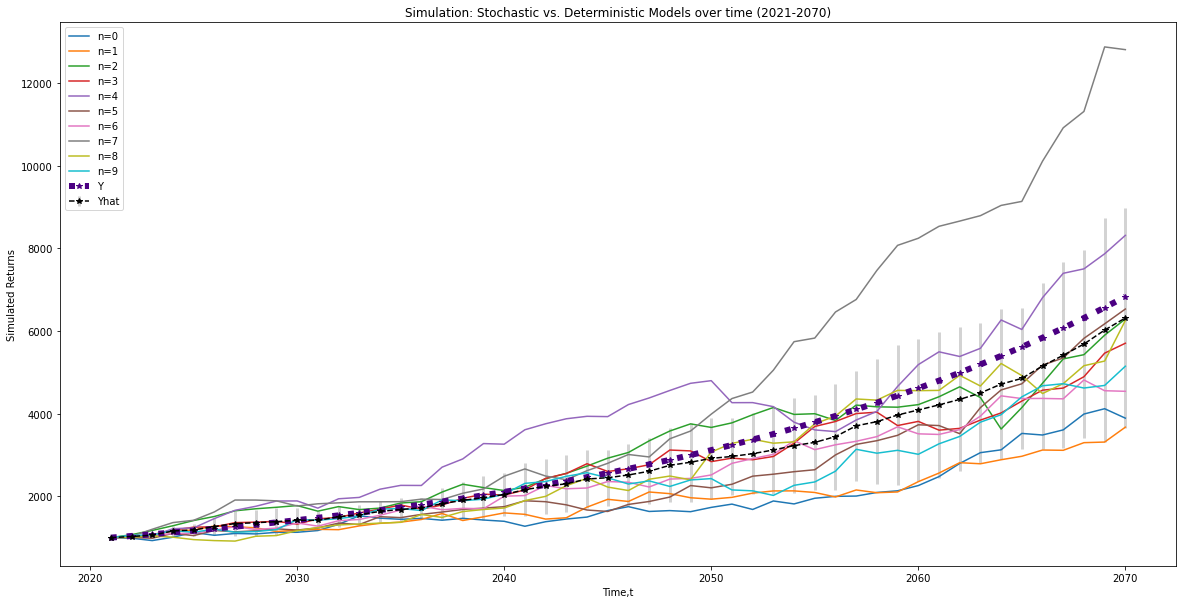

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(df_stochastic['Year'],df_stochastic[['n=0','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','n=9']])
plt.plot(df_stochastic['Year'],df_stochastic['Y'],'*:',color='#4b0082', linewidth=6)
plt.errorbar(df_stochastic['Year'],df_stochastic['Yhat'],yerr=df_stochastic['Error'],fmt ='*--k',ecolor='lightgray', elinewidth=3, capsize=0)
plt.gca().legend(('n=0','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','n=9','Y','Yhat'))
plt.xlabel('Time,t')
plt.ylabel('Simulated Returns')
plt.title('Simulation: Stochastic vs. Deterministic Models over time (2021-2070)')
plt.show()

                              * The two plots (Y: actual return vs. Yhat: estimated return are aligned)

# Simulation stability

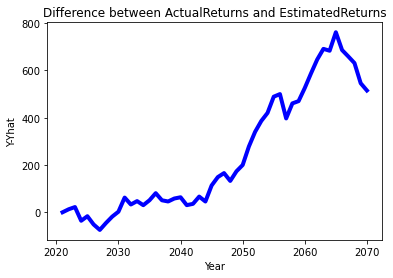

In [16]:
plt.plot(df_stochastic['Year'],df_stochastic['Y-Yhat'],color='b', linewidth=4)
plt.xlabel('Year')
plt.ylabel('Y-Yhat')
plt.title('Difference between ActualReturns and EstimatedReturns')
plt.show()

In [17]:
#MSE for n=10 simulations
MSE=mean_squared_error(df_stochastic['Y'], df_stochastic['Yhat'])
MSE

124617.1443263228

In [82]:
#calculate the MSE for N simulations 

estimated_returns_per_n=[]
means_of_n_simulation=[]
run_time=(2070-2021+1)
N=[10,20,30,40,50,100,200,300,400] #number of simulations
mu=0.04
sigma=0.06
for n in N:
 #   print('start first loop:',n)
    for i in range(n):
#        print('start second loop:',i)
        estimated_returns=[]
        for t in range(1,run_time+1):
#            print('start third loop',t)
            x[t] = x[t-1]* (1+np.random.normal(mu, sigma))
            estimated_returns.append(x[t-1])
        #listoflists for estimated returns for each simulation over time
        estimated_returns_per_n.append(estimated_returns)
 #       print('end third loop',t)
    #calculate the mean of each year over n simulations
    means_of_n_simulation.append([sum(sub_list) / len(sub_list) for sub_list in zip(*estimated_returns_per_n)])      
#    print('end second loop',i)
#print('end first loop',n)

In [83]:
c=[list(i) for i in zip(*means_of_n_simulation)]
dfc=pd.DataFrame(c)
dfc.columns=['avg_n=10','avg_n=20','avg_n=30','avg_n=40','avg_n=50','avg_n=100','avg_n=200','avg_n=300','avg_n=400']
dfc['Year']=year
dfc.set_index('Year',inplace=True)
dfc.reset_index(inplace=True)
dfc['Y']=df['Data']
dfc.head(10)

,Year,avg_n=10,avg_n=20,avg_n=30,avg_n=40,avg_n=50,avg_n=100,avg_n=200,avg_n=300,avg_n=400,Y
0,2021,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
1,2022,1069.019829,1049.147213,1049.835915,1043.113631,1041.037232,1041.239655,1039.515595,1040.404561,1039.847473,1040.000000
2,2023,1120.808517,1096.878387,1085.289814,1083.864029,1082.466524,1081.119849,1079.127108,1082.013973,1081.963101,1081.600000
3,2024,1174.169359,1150.430667,1130.253307,1125.468857,1128.325829,1128.488325,1124.019546,1126.213773,1125.754085,1124.864000
4,2025,1205.957968,1180.366018,1163.508439,1168.014201,1168.886840,1172.408088,1171.494001,1171.158283,1171.400350,1169.858560
5,2026,1216.831864,1192.364278,1191.069937,1205.184046,1214.170297,1218.521488,1215.937669,1217.862507,1218.489047,1216.652902
6,2027,1237.600340,1233.875145,1239.900951,1251.271662,1260.097263,1264.079653,1262.767296,1263.621995,1265.931424,1265.319018
7,2028,1272.039060,1270.443999,1281.199146,1290.181143,1305.174392,1311.331687,1308.714893,1310.655185,1312.156529,1315.931779
8,2029,1315.024227,1313.423776,1323.776152,1339.424516,1360.333183,1364.431212,1360.417900,1362.009105,1364.615567,1368.569050
9,2030,1373.635794,1382.645883,1390.966052,1394.007377,1416.168417,1418.762431,1410.160287,1413.585570,1419.104256,1423.311812


In [84]:
cols=['avg_n=10', 'avg_n=20', 'avg_n=30', 'avg_n=40', 'avg_n=50',
       'avg_n=100', 'avg_n=200', 'avg_n=300', 'avg_n=400']
MSE=[]
for col in cols:
    print('for ',col,', MSE:',mean_squared_error(dfc['Y'], dfc[col]))
    MSE.append(mean_squared_error(dfc['Y'], dfc[col]))

for  avg_n=10 , MSE: 248167.53756618206
for  avg_n=20 , MSE: 90166.6286030076
for  avg_n=30 , MSE: 37240.44976340751
for  avg_n=40 , MSE: 13655.86028340438
for  avg_n=50 , MSE: 3608.3999595547702
for  avg_n=100 , MSE: 3245.7276004419377
for  avg_n=200 , MSE: 7594.809946439602
for  avg_n=300 , MSE: 5025.718917199198
for  avg_n=400 , MSE: 1278.5855165657904


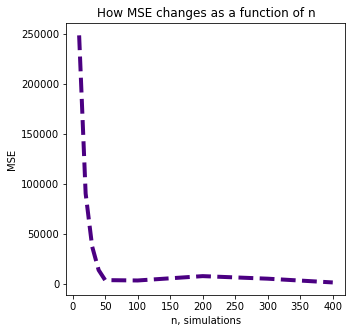

In [85]:
plt.figure(figsize=(5,5))
plt.plot(N,MSE,'--',color='#4b0082', linewidth=4)
plt.xlabel('n, simulations')
plt.ylabel('MSE')
plt.title('How MSE changes as a function of n')
plt.show()

- MSE decreases when n simulation increases ( negative relationship)
- If  mu increases ,MSE[n] increases and vice versa (positive relationship)
- The value of MSE increases when sigma increases and vice versa but still MSE as function of n simulations decreases (whenever sigma inceases or decreases). Therefore we can say that there is no change in MSE[n] if sigma increases or decreases.

# What can you learn from the analysis above? What kind of insights can be drawn from the simulations you have executed? 

    We can see from the analysis that it's much easier to understand the results from the first deterministic model.Its exponential growth function, it gives  the sense that if we invest now, we will get growing returns over time. Therefore its more attractive to choose this model where the risk is low. 

    But maybe this model doesnt reflect or explain enough what happens in the real market (market volatility). For example in the banks, insurance company,...) where there are factors affect the interest rate (r) and make it changing all the time (stochastic).

    By doing many simulations and by changing one component (r) of the model from deterministic to stochastic we saved the model and got realistic results. We increase the risk by showing the up and down returns over time. Executing many simulations mean that we can understand the performance of the model by trial and error (and for sure the cost is high), there are many estimates that should be simulated ( for example mu and sigma for r) to get the best senario of the model.

    From the plots above we can see as much as we do simulations the results get nearer to the detrminstic model and the error is smaller( they meet in different points with the time). 